In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:

# Define the ticker symbol, the period and fetch data
ticker = "AAPL"
period = "10y"

aapl_data = yf.download(ticker, period=period, interval="1d")

# Display the data
print(aapl_data.head())


[*********************100%%**********************]  1 of 1 completed

                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2014-07-31  24.290001  24.362499  23.832500  23.900000  21.140392  227372000
2014-08-01  23.725000  24.155001  23.702499  24.032499  21.257595  194044000
2014-08-04  24.092501  24.145000  23.792500  23.897499  21.138182  159832000
2014-08-05  23.840000  23.920000  23.590000  23.780001  21.034250  223732000
2014-08-06  23.687500  23.870001  23.677500  23.740000  20.998873  154232000


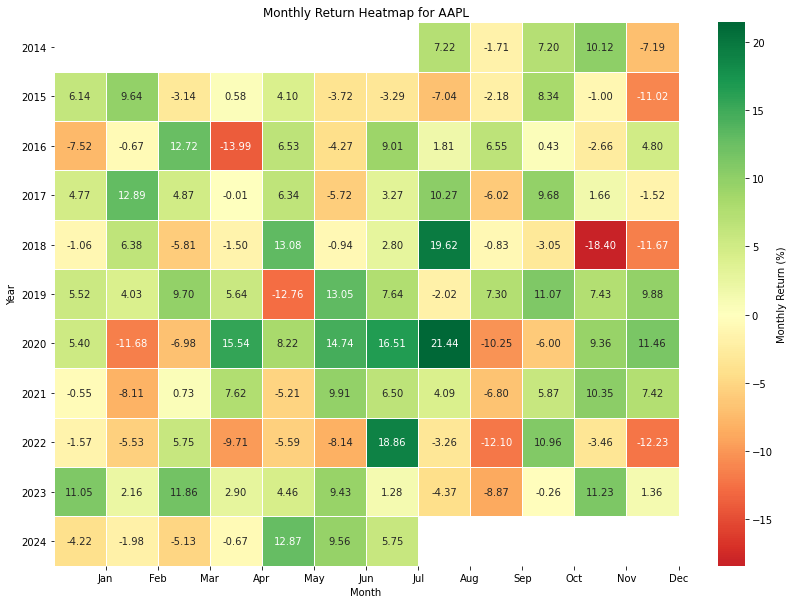

In [3]:
# Calculate monthly percentage change in Close price
aapl_data['Month'] = aapl_data.index.to_period('M')
monthly_close = aapl_data['Close'].resample('M').last()
monthly_pct_change = monthly_close.pct_change() * 100

# Create a pivot table for the heat map
monthly_pct_change_df = monthly_pct_change.to_frame(name='Monthly Return')
monthly_pct_change_df['Year'] = monthly_pct_change_df.index.year
monthly_pct_change_df['Month'] = monthly_pct_change_df.index.month

pivot_table = monthly_pct_change_df.pivot_table(values='Monthly Return', index='Year', columns='Month')

# Plotting the heat map
plt.figure(figsize=(14, 10))
sns.heatmap(pivot_table, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, center=0, cbar_kws={'label': 'Monthly Return (%)'})

# Adjust x-axis to display month names horizontally
plt.xticks(ticks=range(1, 13), labels=[calendar.month_abbr[i] for i in range(1, 13)], rotation=0)
plt.yticks(rotation=0)

plt.title('Monthly Return Heatmap for AAPL')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()
